Decision Tree Model

In [1]:
!pip install graphviz

In [2]:
# import libraries
import numpy as np # for Linear Algebra
import pandas as pd # data preparation and processing
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt

import graphviz # for visualtion of leaf nodes

# ML libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Control display
pd.options.display.max_columns=50

In [3]:
# read the dataset
df = pd.read_csv('heart_disease.csv')
df.head(10) # show first 10 columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
# Number of People with Heart disease
# column for target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [5]:
# Show percentage og male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

# show display
print("Percentage of Female patients: {:.2f}%".format(count_female/(len(df.sex))*100))
print("Percentage of Male patients: {:.2f}%".format(count_male/(len(df.sex))*100))

Percentage of Female patients: 30.44%
Percentage of Male patients: 69.56%


In [6]:
# show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [7]:
# show null or NaN values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# ML train and test data
# create logistic regression
y = df.target.values
x_data =  df.drop(['target'], axis = 1)

In [9]:
# split the data for training(70) and testing(30)
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3, random_state=40 )

In [10]:
# check shape of data after spliting
x_train.shape, x_test.shape

((717, 13), (308, 13))

In [11]:
# check thhe datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [12]:
# check x_train header
x_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
955,62,1,2,130,231,0,1,146,0,1.8,1,3,3
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3
581,44,1,2,140,235,0,0,180,0,0.0,2,0,2
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1
120,54,1,1,108,309,0,1,156,0,0.0,2,0,3


In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
# predict the class label for the test data using thr decision tree
y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accuracy_score
print('Moel acccuray score with criterion gini index:{0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Moel acccuray score with criterion gini index:0.7890


In [15]:
# predict the class label for training data using decision tree
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [16]:
# print the training set of accuracy score
print('training set accuracy score: {0:0.4f}'.format(clf_gini.score(x_train, y_train)))
print('testing set accuracy score: {0:0.4f}'.format(clf_gini.score(x_test, y_test)))

training set accuracy score: 0.8494
testing set accuracy score: 0.7890


[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [346, 371]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\ngini = 0.381\nsamples = 347\nvalue = [258, 89]'),
 Text(0.125, 0.375, 'X[8] <= 0.5\ngini = 0.499\nsamples = 147\nvalue = [70, 77]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 75\nvalue = [15, 60]'),
 Text(0.1875, 0.125, 'gini = 0.361\nsamples = 72\nvalue = [55, 17]'),
 Text(0.375, 0.375, 'X[3] <= 109.0\ngini = 0.113\nsamples = 200\nvalue = [188, 12]'),
 Text(0.3125, 0.125, 'gini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.4375, 0.125, 'gini = 0.072\nsamples = 187\nvalue = [180, 7]'),
 Text(0.75, 0.625, 'X[9] <= 1.7\ngini = 0.363\nsamples = 370\nvalue = [88, 282]'),
 Text(0.625, 0.375, 'X[0] <= 55.5\ngini = 0.287\nsamples = 322\nvalue = [56, 266]'),
 Text(0.5625, 0.125, 'gini = 0.141\nsamples = 196\nvalue = [15, 181]'),
 Text(0.6875, 0.125, 'gini = 0.439\nsamples = 126\nvalue = [41, 85]'),
 Text(0.875, 0.375, 'X[10] <= 0.5\ngini = 0.444\nsamples = 48\nvalue = [32,

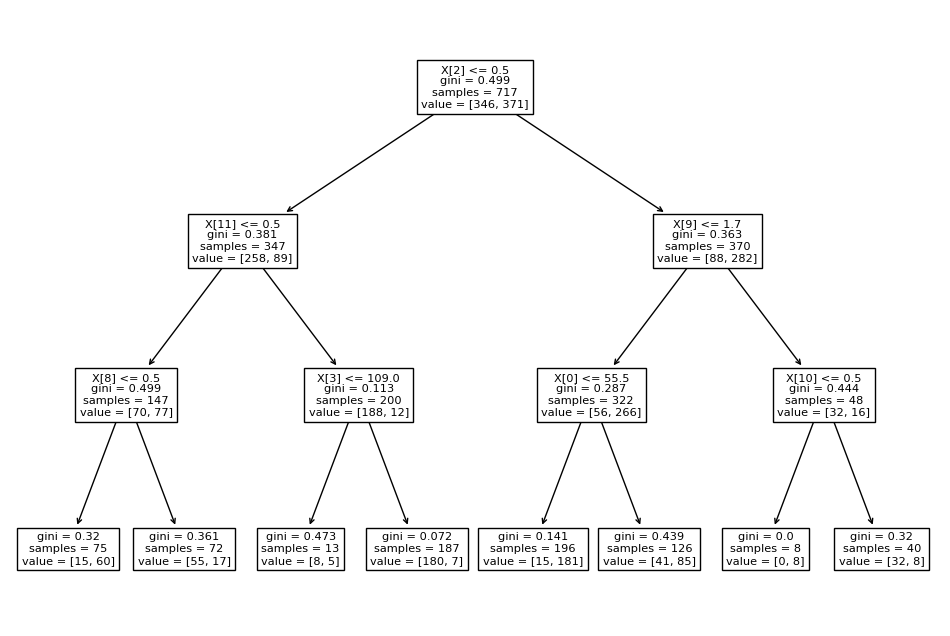

In [17]:
# visual decision tree leaf node
plt.figure(figsize=(12,8)) # create figure for width and height
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [18]:
# second method to show the decision tree
# load dataset 
df2 = pd.read_csv('heart_disease.csv')
y = df2['target'].values
x_data = df2.drop(['target'], axis=1)

# train the decision tree classifier
model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

# get the class name from the dataset
class_names = df2['target'].unique().astype(str)

# generate te graphviz visualization
tree.export_graphviz(model, out_file = 'Heart_disease.dot', feature_names =x_data.columns, class_names= class_names, label='all',filled=True, rounded=True)

In [20]:
from graphviz import Source

# Specify the path to the Dot file
dot_file = 'Heart_disease.dot'

# the decision tree will displayed inform of a picture
decision_tree = Source.from_file(dot_file, format='png')
decision_tree.render(view=True)  # Render and display the graph in the notebook

'Heart_disease.dot.png'